# 1 - Objetivo

Explorar dados de crédito da carteira de uma instituição financeira, para **investigar o motivo da inadimplência dos clientes**, baseado no comportamento de outros atributos como salário, escolaridade e movimentação financeira.

As verificações terão como referência a segunda coluna do conjunto de dados, chamada de **default**, a qual indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`).

# 2 - Importação dos Dados

In [1]:
# Importa as biblioteca auxiliares

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


In [2]:
# Importa o arquivo de dados

URL = '../input/credito/Python_M10_support material.csv'
df = pd.read_csv(URL, na_values = 'na')

In [3]:
# Amostra do arquivo importado / data frame

df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


# 3 - Exploração dos Dados Brutos

In [4]:
# Verifica a quantidade e disposição dos dados

linhas, colunas = df.shape
print(f'O conjunto de dados possui o total de {linhas} linhas e {colunas} colunas.')

O conjunto de dados possui o total de 10127 linhas e 16 colunas.


In [5]:
# Verifica a quantidade e proporção da adimplência (coluna default)

qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f'A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'Equivalente à {qtd_adimplentes} registros.\n')

print(f'A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')
print(f'Equivalente à {qtd_inadimplentes} registros.\n')

A proporcão clientes adimplentes é de 83.93%
Equivalente à 8500 registros.

A proporcão clientes inadimplentes é de 16.07%
Equivalente à 1627 registros.



In [6]:
#Verifica tipo dos dados por colunas

df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [7]:
# Lista colunas com dados do tipo numérico

df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [8]:
# Lista colunas com dados do tipo 'object'

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


**Atenção:**
* As colunas "limite_credito" e "valor_transacoes_12m" estão classificadas incorretamente com o tipo "object", ao invés do tipo numérico.

* As colunas "escolaridade", "estado_civil" e "salario_anual" posuem menor número de dados.

In [9]:
# Verifica os dados faltantes

df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

### 3.1 - Análise do Impacto dos Dados Faltantes

In [10]:
# Cria função que coleta informações dos registros faltantes

def stats_dados_faltantes(df: pd.DataFrame):

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)
        
  for stat in stats_dados_faltantes:
    print(stat)

In [11]:
# Representatividade em todos os clientes

print('Proporção dos dados faltantes em relação a todos os clientes:\n')
stats_dados_faltantes(df=df)

Proporção dos dados faltantes em relação a todos os clientes:

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [12]:
# Representatividade nos clientes Adimplentes

print('Proporção dos dados faltantes em relação aos clientes Adimplentes:\n')
stats_dados_faltantes(df=df[df['default'] == 0])

Proporção dos dados faltantes em relação aos clientes Adimplentes:

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [13]:
# Representatividade nos clientes Inadimplentes

print('Proporção dos dados faltantes em relação aos clientes Inadimplentes:\n')
stats_dados_faltantes(df=df[df['default'] == 1])

Proporção dos dados faltantes em relação aos clientes Inadimplentes:

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


* Observa-se que a proporção dos dados faltantes é muito similar entre os clientes Adimplentes e Inadimplentes. A exclusão de tais registros não prejudicará a análise.

# 4 - Tratamento dos Dados

#### 4.1 - Exclusão dos registros com dados faltantes

In [14]:
# Exclui registros com dados faltantes

df.dropna(inplace=True)

# Shape do novo conjunto de dados

linhas, colunas = df.shape
print(f'O novo conjunto de dados possui o total de {linhas} linhas e {colunas} colunas.')

O novo conjunto de dados possui o total de 7081 linhas e 16 colunas.


In [15]:
# Compara as proporções, após a remoção dos dados faltantes

qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f'A proporcão adimplentes era de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%\n')

print(f'A proporcão clientes inadimplentes era de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')
print(f'A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%')

A proporcão adimplentes era de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes era de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


#### 4.2 - Converte dados "object" em numéricos

In [16]:
# Cria função que corrige os caracteres especiais "." e "," e converte o dado para o tipo "float"

fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

# Aplica a função nas colunas desejadas

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [17]:
# Verifica os tipos de dados

df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [18]:
# Verifica as colunas com dados numéricos

df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.00,0.00,0.00,0.00,1.00
idade,7081.0,46.347691,8.041225,26.00,41.00,46.00,52.00,73.00
dependentes,7081.0,2.337805,1.291649,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,7081.0,35.981359,8.002609,13.00,31.00,36.00,40.00,56.00
qtd_produtos,7081.0,3.819376,1.544444,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,7081.0,2.454456,1.104917,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,7081.0,2.342607,0.995104,0.00,2.00,2.00,3.00,6.00
limite_credito,7081.0,8493.259524,9126.082105,1438.00,2498.35,4287.22,10729.40,34516.99
valor_transacoes_12m,7081.0,4394.800669,3468.457771,510.16,2089.63,3831.09,4740.51,17995.49
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.00,44.00,67.00,80.00,134.00


# 5 - Visualização dos Dados

Finalizada a preparação dos dados, vamos iniciar as investigações para entender qual fator leva um cliente à inadimplencia.

In [19]:
# Determina as variáves com as bases de dados que serão utilizadas

df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

#### 5.1 - Dados Categóricos
* Escolaridade, Estado Civil, Salário Anual e Tipo do Cartão

##### 5.1.1 - Escolaridade

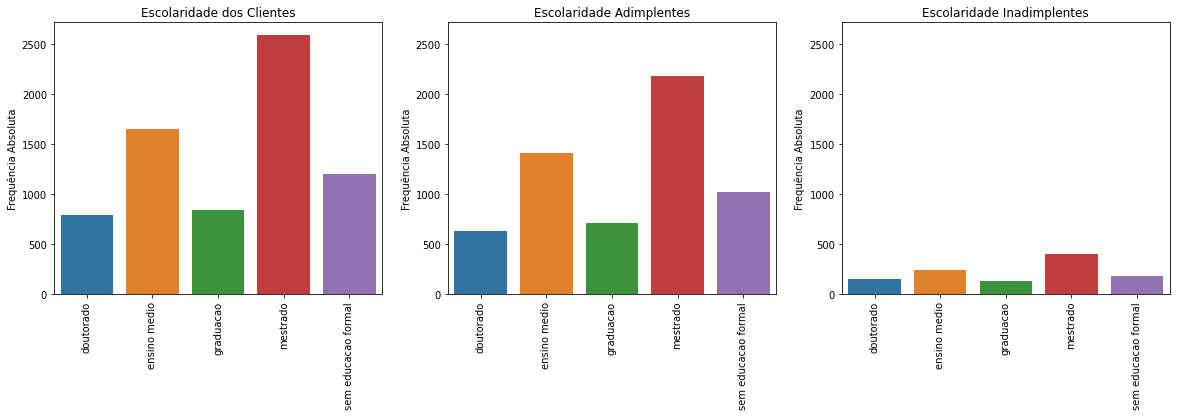

In [20]:
# Elaboração do gráfico

coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade Adimplentes', 'Escolaridade Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

##### 5.1.2 - Estado Civil

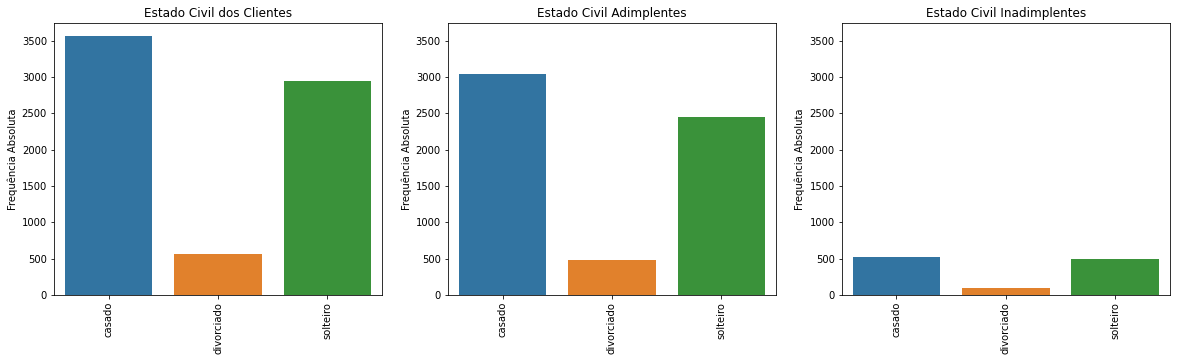

In [21]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil Adimplentes', 'Estado Civil Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

##### 5.1.3 - Salário Anual

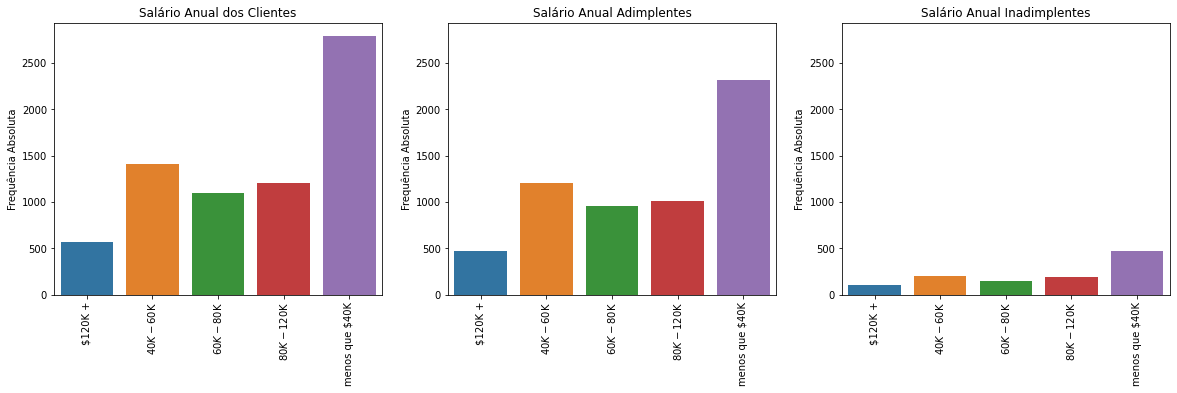

In [22]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual Adimplentes', 'Salário Anual Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

##### 5.1.4 - Tipo do Cartão

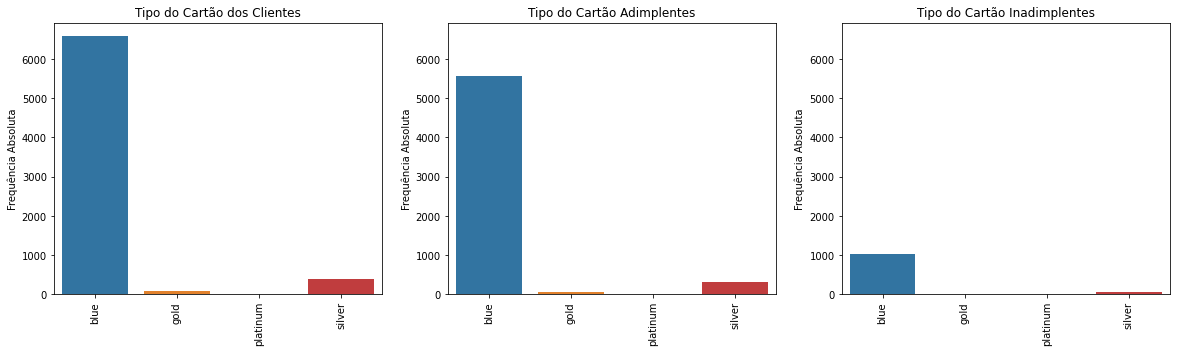

In [23]:
coluna = 'tipo_cartao'
titulos = ['Tipo do Cartão dos Clientes', 'Tipo do Cartão Adimplentes', 'Tipo do Cartão Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Visão ampliada do gráfico: **Tipo de Cartão dos Clientes Inadimplentes**

,frequencia_absoluta,tipo_cartao
blue,1034,blue
gold,13,gold
platinum,3,platinum
silver,63,silver


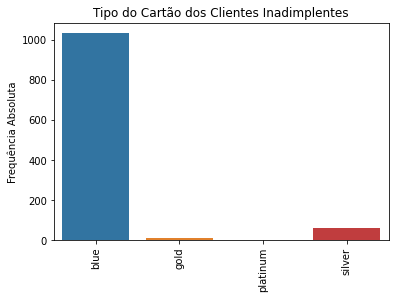

In [24]:
coluna = 'tipo_cartao'
titulos = ['Tipo do Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

df_to_plot = df_inadimplente[coluna].value_counts().to_frame()
df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
df_to_plot[coluna] = df_to_plot.index
df_to_plot.sort_values(by=[coluna], inplace=True)
df_to_plot.sort_values(by=[coluna])

f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'])
f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')
f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

figura.show()

# Monta tabela com os valores:

display(df_to_plot)

#### 5.2 - Dados Numéricos
* Relação entre a variável resposta default com os atributos numéricos.
* Limite de Crédito, Iteracoes, Quantidade e Valores das transações nos últimos 12 meses.

#### 5.2.1 - Limite de Crédito

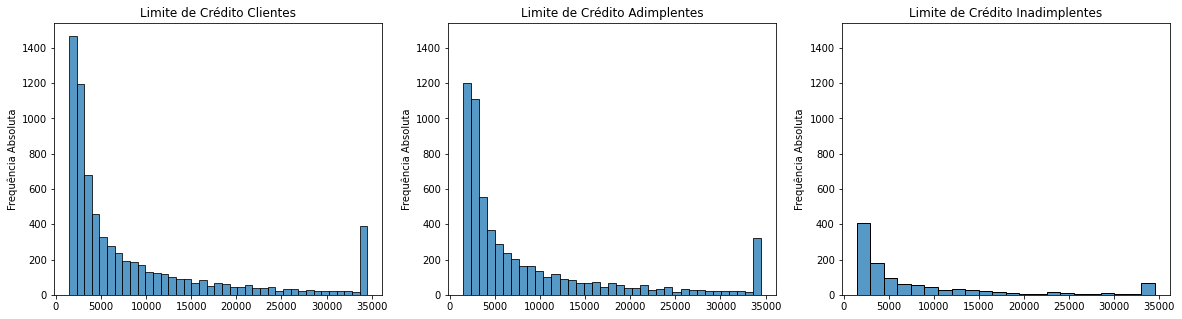

In [25]:
coluna = 'limite_credito'
titulos = ['Limite de Crédito Clientes', 'Limite de Crédito Adimplentes', 'Limite de Crédito Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

#### 5.2.2 - Iterações nos últimos 12 meses

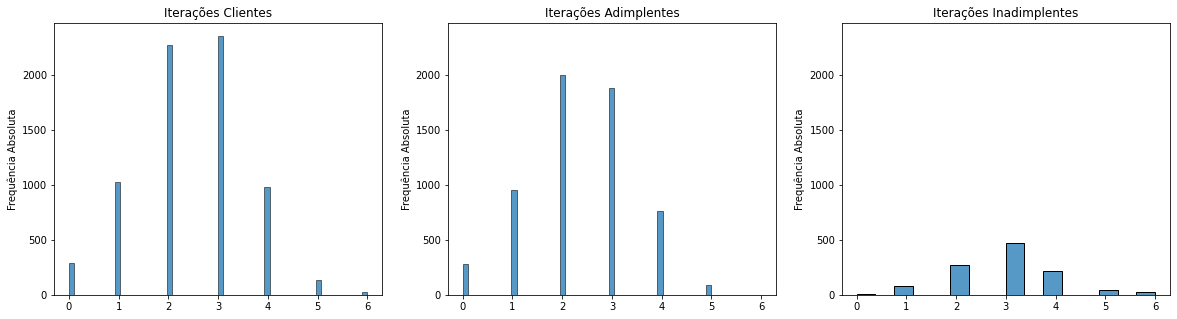

In [26]:
coluna = 'iteracoes_12m'
titulos = ['Iterações Clientes', 'Iterações Adimplentes', 'Iterações Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

#### 5.2.3 - Quantidade de Transações nos últimos 12 meses

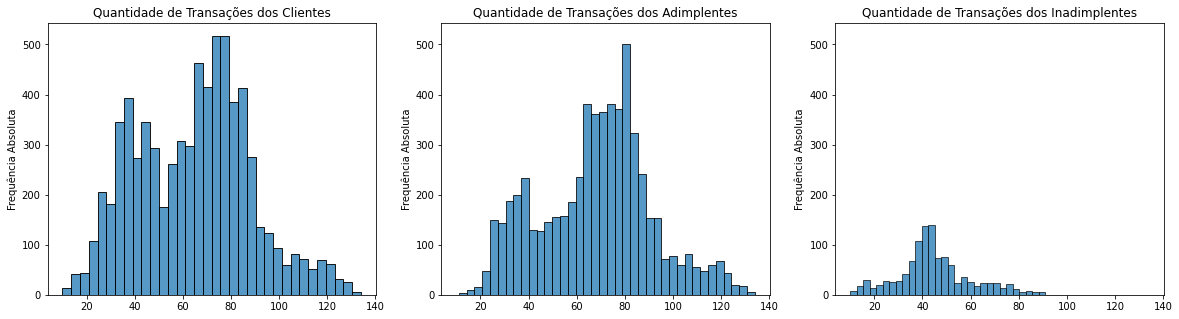

In [27]:
coluna = 'qtd_transacoes_12m'
titulos = ['Quantidade de Transações dos Clientes', 'Quantidade de Transações dos Adimplentes', 'Quantidade de Transações dos Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

#### 5.2.4 - Valor de Transações nos últimos 12 meses

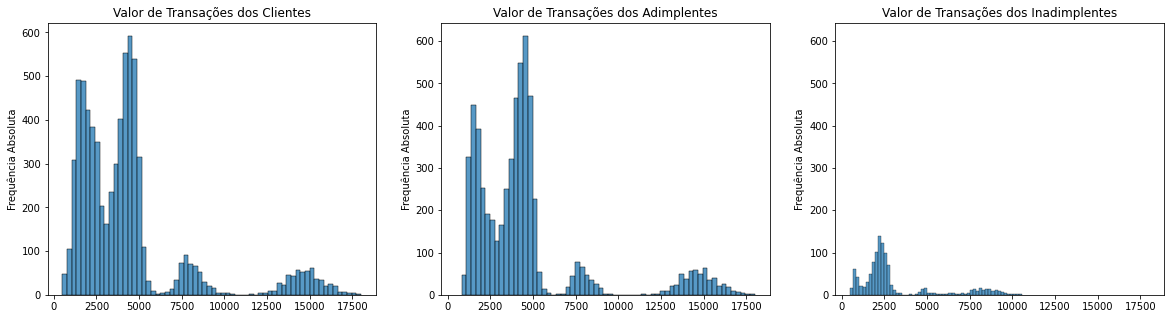

In [28]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor de Transações dos Clientes', 'Valor de Transações dos Adimplentes', 'Valor de Transações dos Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

#### 5.2.5 - Relação entre o Valor e Quantidade das Transações considerando os clientes Adimplentes e Inadimplentes.

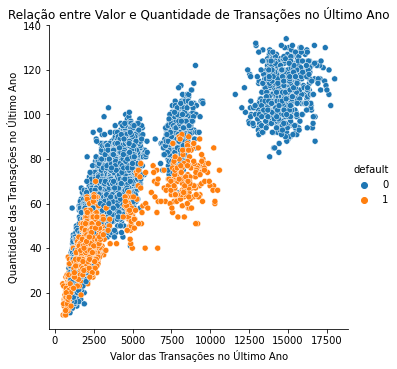

In [29]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

# 6 - Conclusão

* O conjunto de dados original possuía registros incompletos e informações cadastradas com tipo de dados equivocados. O tratamento da base permitiu retirar tais inconsistências sem prejudicar o universo de dados e sem afetar a proporção entre clientes adimplentes e inadimplentes.

* A análise gráfica dos dados categóricos (Escolaridade, Estado Civil, Salário Anual e Tipo do Cartão) não revelou alterações que justificassem o motivo da inadimplência dos clientes.

* Por sua vez, a análise dos **valores numéricos** revelou uma diferença de comportamento entre clientes adimplentes e inadimplentes, especialmente em relação ao **Valor e a Quantidade de transações** realizadas nos últimos 12 meses.

* A correlação destes dados demonstra uma concentração de inadimplência em dois principais grupos:

> a) clientes com até 60 transações, com valores até 5.000 reais;

> b) clientes com 60 a 90 transações, com valores na faixa de 6.000 a 11.000 reais.

* Desta forma, a exploração mais aprofundada de tais nichos poderá tazer novos insights sobre o comportamento de inadimplência dos clientes. 